In [31]:
import Discretization
from Discretization import FairRegressionDiscret_without_sens

import numpy as np
from scipy.special import softmax
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [32]:
def y(X, N):
    return np.dot(X, np.ones(3) * 3) + np.random.normal(0, 1, N)

In [33]:
thr = 0

In [34]:
N_train = 500
X_train = np.random.normal(0, 1, (N_train, 3))
y_train = y(X_train, N_train)
sens = np.zeros(N_train)
sens[X_train[:, 0] < thr] = -1
sens[X_train[:, 0] >= thr] = 1

In [35]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [36]:
clf = LogisticRegression()
clf.fit(X_train,sens)

LogisticRegression()

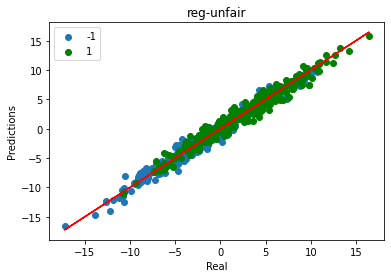

In [37]:
plt.title('reg-unfair')
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.scatter(y_train[sens == -1], reg.predict(X_train)[sens == -1], label = '-1')    
plt.scatter(y_train[sens == 1], reg.predict(X_train)[sens == 1], c='g', label = '1')
plt.plot(y_train, y_train, c = 'r')
plt.legend()

In [38]:
N_unlab = 1000
X_unlab = np.random.normal(0, 1, (N_unlab, 3))

sens = np.zeros(N_unlab)
sens[X_unlab[:, 0] < thr] = -1
sens[X_unlab[:, 0] >= thr] = 1

In [39]:
fair_reg = FairRegressionDiscret_without_sens(reg, clf)

In [40]:
fair_reg.fit(X_unlab)

In [41]:
N_test = 1000
X_test = np.random.normal(0, 1, (N_test, 3))
sens = np.zeros(N_test)
sens[X_test[:, 0] < thr] = -1
sens[X_test[:, 0] >= thr] = 1
y_test = y(X_test, N_test)

#### fair 

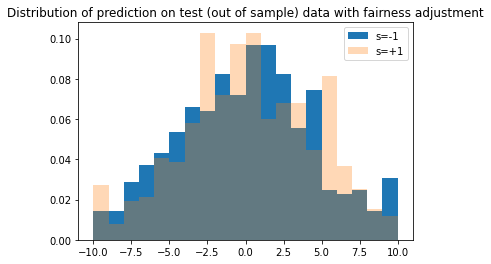

In [42]:
y_pred = fair_reg.predict(X_test)
y_pred0 = y_pred[sens == -1]
y_pred1 = y_pred[sens == 1]

plt.figure('1')
plt.hist(y_pred0, label='s=-1', density=True, stacked=True, bins=20)
plt.hist(y_pred1, label='s=+1', alpha=0.3, density=True, stacked=True, bins=20)
plt.title('Distribution of prediction on test (out of sample) data with fairness adjustment')
plt.legend()

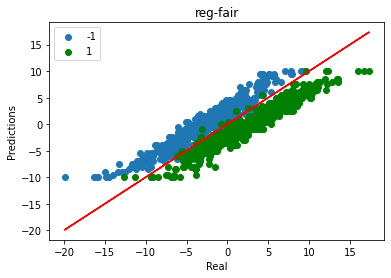

In [43]:
plt.title('reg-fair')
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.scatter(y_test[sens == -1], y_pred[sens == -1], label = '-1')    
plt.scatter(y_test[sens == 1], y_pred[sens == 1], label = '1', c='g')
plt.plot(y_test, y_test, c = 'r')
plt.legend()

#### meanwhile the "unfair"

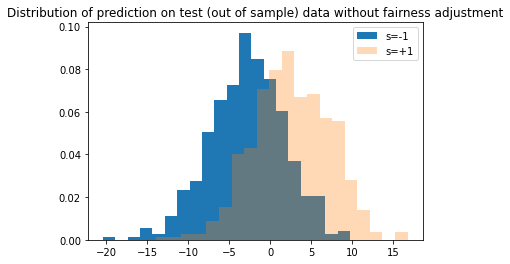

In [44]:
y_pred = reg.predict(X_test)
y_pred0 = y_pred[sens == -1]
y_pred1 = y_pred[sens == 1]

plt.figure('1')
plt.hist(y_pred0, label='s=-1', density=True, stacked=True, bins=20)
plt.hist(y_pred1, label='s=+1', alpha=0.3, density=True, stacked=True, bins=20)
plt.title('Distribution of prediction on test (out of sample) data without fairness adjustment')
plt.legend()

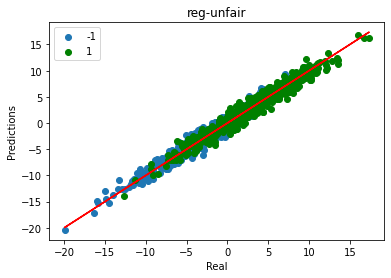

In [45]:
plt.title('reg-unfair')
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.scatter(y_test[sens == -1], y_pred[sens == -1], label = '-1')    
plt.scatter(y_test[sens == 1], y_pred[sens == 1], label = '1', c='g')
plt.plot(y_test, y_test, c = 'r')
plt.legend()